<a class="anchor" id="0"></a>
# **Feature Selection**

Hey everyone,

Today, we're talking about **Feature Selection** for our machine learning projects. It's like choosing the most important puzzle pieces from a big pile. This helps our models work better and faster. We'll mainly focus on one way to do this called wrapper methods.

Let's dive in!

**And as always, I hope you find this <font color="red"><b>FEATURE SELECTION APPLICATIONS</b></font> useful**.

<a class="anchor" id="0"></a>
# **Table of Contents :**


-	[Wrapper Methods](#1)


   - 1. [Forward Selection](#2)
   - 2. [Backward Elimination](#3)
   - 3. [Exhaustive Feature Selection](#4)
   - 4. [Recursive Feature Elimination](#5)
   - 5. [Recursive Feature Elimination with Cross-Validation](#6)

**Advantages of Feature selection:**

- Picking the right features helps in many ways:

  1. Makes our predictions more accurate.
  2. Makes our models easier to understand.
  3. Trains our models faster.
  4. Helps avoid overfitting, where the model is too tailored to the training data.
  5. Reduces the chances of errors in our data.
  6. Helps prevent our models from getting confused when there are lots of features.

**Feature Selection Techniques**

We have three main ways to pick features:

  1. Filter methods
  2. Wrapper methods
  3. Hybrid/Embedded methods

**1. Filter Methods**

- These include:

  1. Basic methods
  2. Looking at one feature at a time
  3. Measuring information gain
  4. Calculating Fischer score
  5. Using a heatmap to check feature correlation

**2. Wrapper Methods**

- These methods involve:

  1. Trying features one by one (Forward Selection)
  2. Removing features one by one (Backward Elimination)
  3. Trying all possible combinations of features (Exhaustive Feature Selection)
  4. Removing features based on how well they perform (Recursive Feature Elimination)
  5. Same as (Recursive Feature Elimination) but with cross-validation (Recursive feature elimination with cross-validation)

**3. Hybrid Methods**

- These methods include:

  1. LASSO
  2. RIDGE
  3. Tree Importance

![Wrapper Methods](samo.png)

Next, we'll go into detail about **wrapper methods**.

# **1. Wrapper Methods** <a class="anchor" id="1"></a>

[Table of Contents](0)


In wrapper methods, we start with some features and train a model. Then, based on what we learn from that model, we decide if we should add or remove features. It's like solving a puzzle where we try different combinations of pieces until we find the best fit. These methods can take a lot of time and computer power.

Here's a simple graphic to help understand wrapper methods:

![Wrapper Methods](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1537549832/Image2_ajaeo8.png)

## **1-1 Forward Selection** <a class="anchor" id="2"></a>

[Table of Contents](#0)

**Forward Selection: What It Does?**
Forward selection is like building a puzzle one piece at a time. We start with no pieces, then add one that fits best. Each time, we pick the piece that improves the puzzle the most. This continues until adding more pieces doesn't make the puzzle better.

**How It Works**
- We begin with no features.
- We pick the best feature and add it.
- In each step, we add the feature that improves the model the most.
- We keep doing this until adding more features doesn't help anymore.

**Step Forward Feature Selection**
- First, we look at each feature alone and pick the best one.
- Then, we combine this feature with each other feature and see which pair works best.
- We keep going, trying all possible combinations of features.
- We stop when we reach a set number of selected features.

**Why It's Called "Greedy"**
- It's called greedy because it looks at every possible combination of features, which can be a lot.
- This makes it take a long time and sometimes it's not possible to try every combination.

**Using Python's mlxtend Package**
- There's a package called mlxtend in Python that helps with this.
- It makes it easier to do step forward feature selection.
- I'll use it to show how it works with a dataset about house prices.


In [1]:
# step forward feature selection

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load dataset
data = pd.read_csv('train.csv')
data.shape

(1460, 81)

In [3]:
data


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
da = data.dropna()
X = da.drop(['SalePrice'], axis=1)
y = da['SalePrice']

In [5]:
# select only numerical columns:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

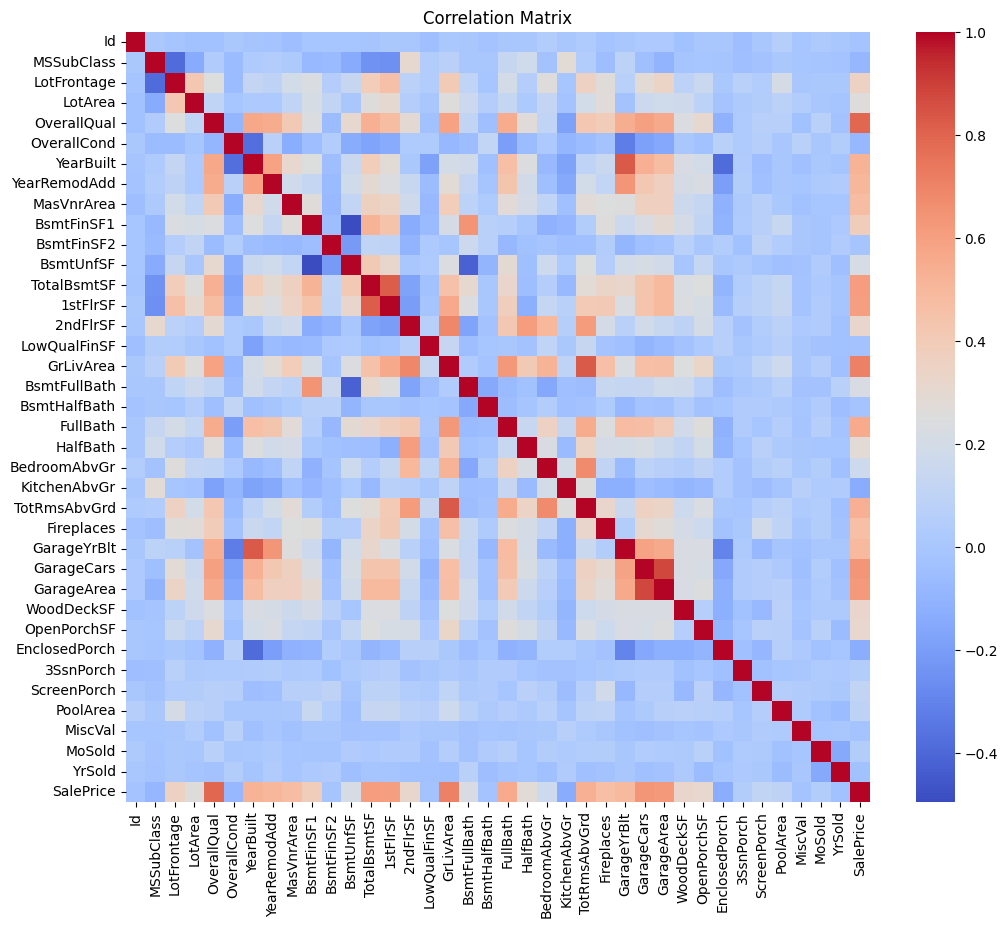

In [6]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [7]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 37), (438, 37))

In [8]:
# Highly correlated features can cause redundancy in the information they provide to the model. This redundancy can lead to overfitting.
# so, we will find and remove the correlated features:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  3


In [9]:
# removed correlated features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((1022, 34), (438, 34))

In [10]:
# Calculate the mean of each column
means = X_train.mean()

# Fill missing values with the mean of each column
X_train.fillna(means, inplace=True)


In [11]:
# step forward feature selection

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(RandomForestRegressor(), 
        k_features=10, 
        forward=True, 
        floating=False, 
        verbose=1,
        scoring='r2',
        cv=3)

sfs1 = sfs1.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   20.7s finished
Features: 1/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:   22.4s finished
Features: 2/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:   24.0s finished
Features: 3/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:   25.1s finished
Features: 4/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   26.9s finished
Features: 5/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:   31.8s finished
Features: 6/10[Parallel(

In [12]:
sfs1.k_feature_idx_

(4, 5, 6, 9, 13, 14, 17, 19, 22, 24)

In [13]:
X_train.columns[list(sfs1.k_feature_idx_)]

Index(['OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', '1stFlrSF',
       '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'KitchenAbvGr', 'GarageCars'],
      dtype='object')

In [14]:
from sklearn.ensemble import RandomForestRegressor

# Selecting the 10 features
selected_features = X_train.columns[list(sfs1.k_feature_idx_)]

# Creating new training and testing datasets with only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Initialize Random Forest Regressor
rf_regressor = RandomForestRegressor()

# Train the Random Forest Regressor on the selected features
rf_regressor.fit(X_train_selected, y_train)

# Predict on the test set
y_pred = rf_regressor.predict(X_test_selected)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)


R^2 Score: 0.8599027754845541


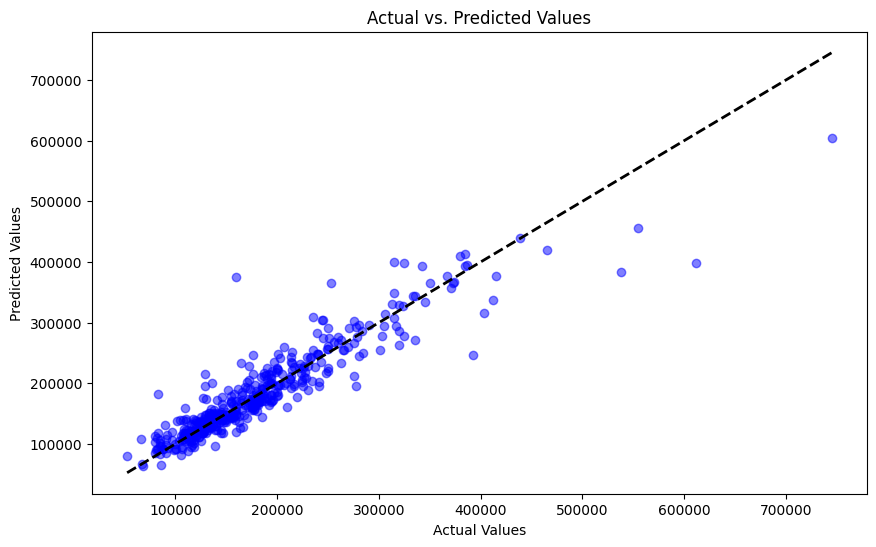

In [15]:
import matplotlib.pyplot as plt

# Plotting Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()


- We can see that forward feature selection results in the above columns being selected from all the given columns.

## **1-2 Backward Elimination** <a class="anchor" id="3"></a>

[Table of Contents](#0) 


- In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features.

- The procedure starts with the full set of attributes. At each step, it removes the worst attribute remaining in the set.


In [14]:
# step backward feature elimination

sfs1 = SFS(RandomForestRegressor(), 
        k_features=10, 
        forward=False, 
        floating=False, 
        verbose=2,
        scoring='r2',
        cv=3)

sfs1 = sfs1.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:  4.1min finished

[2024-05-13 09:07:44] Features: 33/10 -- score: 0.8588230103224186[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:  3.9min finished

[2024-05-13 09:11:36] Features: 32/10 -- score: 0.8580631282127663[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:  3.6min finished

[2024-05-13 09:15:10] Features: 31/10 -- score: 0.8606951060643863[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

In [15]:
sfs1.k_feature_idx_

(3, 4, 5, 6, 9, 14, 16, 22, 24, 26)

In [16]:
X_train.columns[list(sfs1.k_feature_idx_)]

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1',
       '2ndFlrSF', 'GrLivArea', 'KitchenAbvGr', 'GarageCars', 'OpenPorchSF'],
      dtype='object')

- So, backward feature elimination results in the following columns being selected.

In [17]:
from sklearn.ensemble import RandomForestRegressor

# Selecting the 10 features
selected_features = X_train.columns[list(sfs1.k_feature_idx_)]

# Creating new training and testing datasets with only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Initialize Random Forest Regressor
rf_regressor = RandomForestRegressor()

# Train the Random Forest Regressor on the selected features
rf_regressor.fit(X_train_selected, y_train)

# Predict on the test set
y_pred = rf_regressor.predict(X_test_selected)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)


R^2 Score: 0.8643854847849496


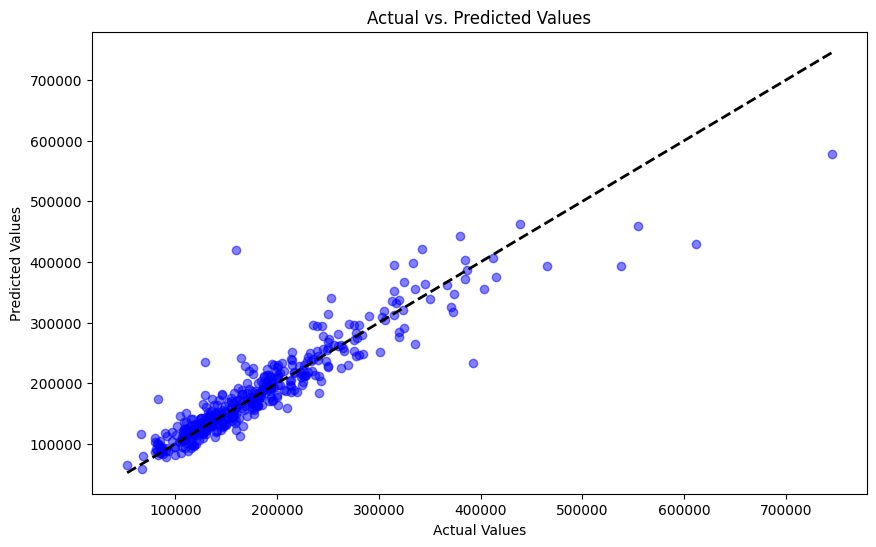

In [18]:
import matplotlib.pyplot as plt

# Plotting Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()


## **1-3 Exhaustive Feature Selection** <a class="anchor" id="4"></a>

[Table of Contents](#0) 


- In an exhaustive feature selection the best subset of features is selected, over all possible feature subsets, by optimizing a specified performance metric for a certain machine learning algorithm. For example, if the classifier is a logistic regression and the dataset consists of 4 features, the algorithm will evaluate all 15 feature combinations as follows:

  - all possible combinations of 1 feature
  - all possible combinations of 2 features
  - all possible combinations of 3 features
  - all the 4 features


and select the one that results in the best performance (e.g., classification accuracy) of the logistic regression classifier.

- This is another greedy algorithm as it evaluates all possible feature combinations. It is quite computationally expensive, and sometimes, if feature space is big, even unfeasible.

- The search will finish when we reach the desired number of selected features.

- This is somewhat arbitrary because we may be selecting a subopimal number of features, or likewise, a high number of features.

## **1-4 Recursive Feature elimination** <a class="anchor" id="5"></a>

[Table of Contents](#0) 


- It is a greedy optimization algorithm which aims to find the best performing feature subset. It repeatedly creates models and keeps aside the best or the worst performing feature at each iteration. It constructs the next model with the left features until all the features are exhausted. It then ranks the features based on the order of their elimination.

- Recursive feature elimination performs a greedy search to find the best performing feature subset. It iteratively creates models and determines the best or the worst performing feature at each iteration. It constructs the subsequent models with the left features until all the features are explored. It then ranks the features based on the order of their elimination.

## **1-5 Recursive Feature Elimination with Cross-Validation** <a class="anchor" id="6"></a>

[Table of Contents](#0) 


- **Recursive Feature Elimination with Cross-Validated (RFECV)** feature selection technique selects the best subset of features for the estimator by removing 0 to N features iteratively using recursive feature elimination.

- Then it selects the best subset based on the accuracy or cross-validation score or roc-auc of the model. Recursive feature elimination technique eliminates n features from a model by fitting the model multiple times and at each step, removing the weakest features.